The dataset used in this project comes from the UCI Machine Learning Repository. This data was collected in 1978 and each of the 506 entries represents aggregate information about 14 features of homes from various suburbs located in Boston.

The features can be summarized as follows:
* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 1000 bucks
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000s

<a id = 'library'></a>
# Importing libraries and the dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
data = pd.DataFrame(boston.data)

### First look at the dataset

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
data.columns = boston.feature_names

In [6]:
data['PRICE'] = boston.target 

In [7]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
print(data.shape)

(506, 14)


In [9]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

No null values in the dataset, no missing value treatement needed

In [10]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


This is sometimes very useful, for example if you look at the CRIM the max is 88.97 and 75% of the value is below 3.677083 and mean is 3.613524 so it means the max values is actually an outlier or there are outliers present in the column

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


<a id = 'visual'></a>
# Visualisation

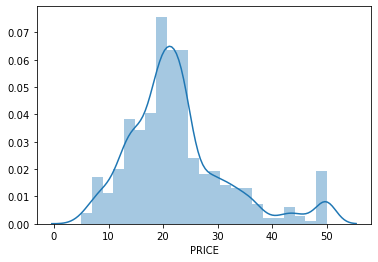

In [12]:
import seaborn as sns
sns.distplot(data.PRICE)

The distribution seems normal, has not be the data normal we would have perform log transformation or took to square root of the data to make the data normal. Normal distribution is need for the machine learning for better predictiblity of the model

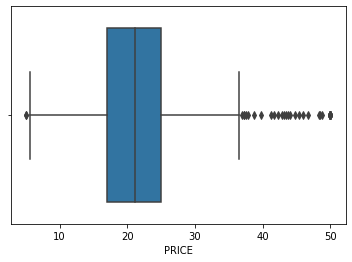

In [13]:
sns.boxplot(data.PRICE)

<a id = 'corr'></a>
### Checking the correlation of the independent feature with the dependent feature

Correlation is a statistical technique that can show whether and how strongly pairs of variables are related.An intelligent correlation analysis can lead to a greater understanding of your data

In [14]:
correlation = data.corr()
correlation.loc['PRICE']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
PRICE      1.000000
Name: PRICE, dtype: float64

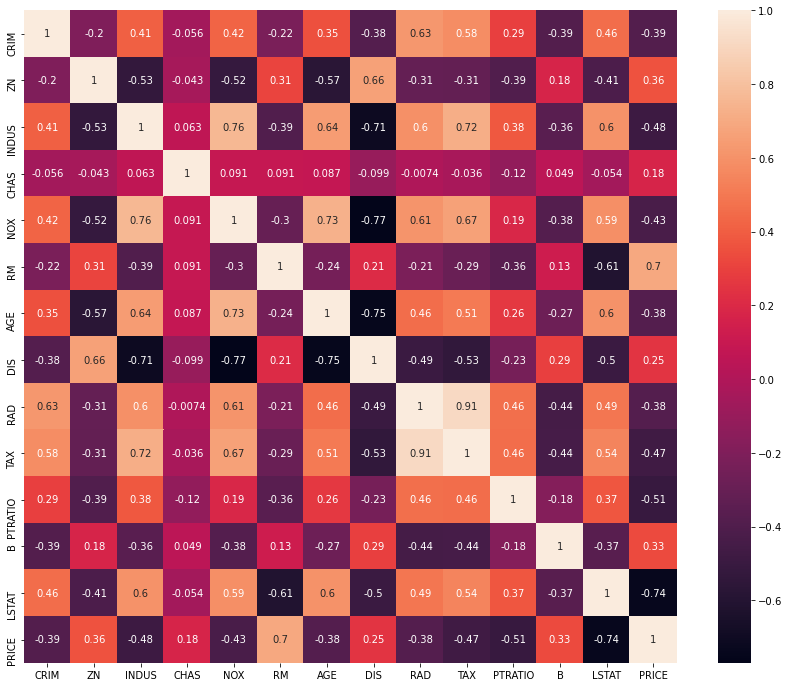

In [15]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(figsize=(15,12))
sns.heatmap(correlation,square = True,annot = True)

By looking at the correlation plot LSAT is negatively correlated with -0.75 and RM is positively correlated to the price and PTRATIO is correlated negatively with -0.51

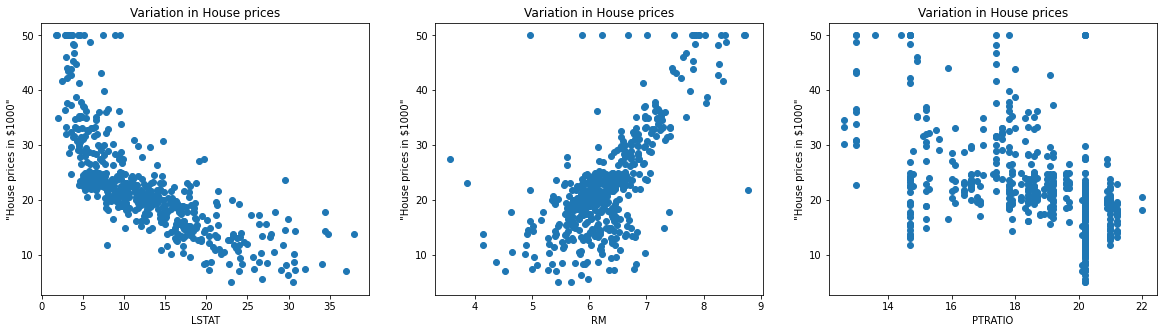

In [16]:
plt.figure(figsize = (20,5))
features = ['LSTAT','RM','PTRATIO']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = data.PRICE
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')

<a id = 'split'></a>
### Splitting the dependent feature and independent feature 

In [17]:
X = data.iloc[:,:-1]
y= data.PRICE

<a id = 'valid'></a>
### Splitting the data for Model Validation 

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

<a id  = 'NN'></a>
## Neural Networks

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

* We are using Keras for developing the neural network.
* Models in Keras are defined as a sequence of layers
* We create a Sequential model and add layers one at a time with activation function
* Activation function decides, whether a neuron should be activated or not by calculating weighted sum and further adding bias with it. The purpose of the activation function is to introduce non-linearity into the output of a neuron.The activation we are using is relu
* As this is a regression problem, the output layer has no activation function
* Elements of neural network has input layer, hidden layer and output layer
* input layer:- This layer accepts input features. It provides information from the outside world to the network, no computation is performed at this layer, nodes here just pass on the information(features) to the hidden layer.
* Hidden layer:-  Nodes of this layer are not exposed to the outer world, they are the part of the abstraction provided by any neural network. Hidden layer performs all sort of computation on the features entered through the input layer and transfer the result to the output layer.
* Output layer:- This layer bring up the information learned by the network to the outer world.
* Model Compilation:- The compilation is the final step in creating a model. Once the compilation is done, we can move on to training phase.
* Optimizer : - The optimizer we are using is adam. Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.
* Loss - mean square error

In [25]:
import keras
from keras.layers import Dense, Activation,Dropout
from keras.models import Sequential

model = Sequential()

model.add(Dense(128,activation  = 'relu',input_dim =13))
model.add(Dense(64,activation  = 'relu'))
model.add(Dense(32,activation  = 'relu'))
model.add(Dense(16,activation  = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

Using TensorFlow backend.


In [26]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
13/13 [==============================] - 0s 2ms/step - loss: 539.2366
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 410.1736
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 186.1440
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 65.4258
Epoch 5/100
13/13 [==============================] - 0s 1ms/step - loss: 30.3596
Epoch 6/100
13/13 [==============================] - 0s 1ms/step - loss: 24.8689
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 21.1246
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 19.4331
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 17.8774
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 16.5680
Epoch 11/100
13/13 [==============================] - 0s 1ms/step - loss: 15.4583
Epoch 12/100
13/13 [==============================] - 0s 1ms/step - loss: 15.2002
Epoch 13/100
13/13 [==

<a id = 'eval'></a>
### Evaluation of the model

In [27]:
y_pred = model.predict(X_test)

In [28]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.9081469163989192


In [29]:
# Predicting RMSE the Test set results
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

2.9209864239066645
